### Stationarity & Basic Concepts
#### 1. Asset Returns

대부분의 금융 연구는 자산의 가격 대신 수익률을 사용한다. 그 이유는 다음과 같다
1. 일반 투자자들에게 자산의 수익은 투자 기회에 대한 완전하고 규모가 없는 요약이다
2. 전자가 더 매력적인 통계적 특성을 가지고 있기 때문에, 수익률 시계열은 가격 시계열보다 다루기 쉽다

**One period Simple Return**

$t-1$기부터 $t$기까지의 자산을 보유하였을 때의 simple growth return은 다음과 같이 표현할 수 있다

$$1 + R_t = \frac{P_t}{P_{t-1}}~~~~~\mbox{or}~~~~~P_t = P_{t-1}(1 + R_t)$$

simple net return 혹은 simple return은 다음과 같이 표현 가능하다

$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

**Multiperiod Simple Return**

자산을 k 기간동안 보유하였을 때의 simple growth return은
$$1 + R_t[k] = \frac{P_t}{P_{t-k}} = (1 + R_t)(1+R_{t-1})\cdots(1+R_{t-k+1})=\prod_{j=0}^{k-1}(1+R_{t-j})$$
이다.

Annualized average return은 다음과 같이 정의한다

$$\mbox{Annualized}\{R_t[k]\} = \Big[ \prod_{j=0}^{k-1}(1+R_{t-j}) \Big]^{\frac{1}{k}} -1$$

계산의 편의를 위해 다음과 같이 쓰기도 한다

$$\mbox{Annualized}\{R_t[k]\} = \exp \Big[ \frac{1}{k} \sum_{j=0}^{k-1}\ln(1+R_{t-j}) \Big] -1$$

python에서 `pandas.DataFrame`의 `pct_change()` method를 사용하면 위와 같이 계산한다

**Continuously Compounded Return**

log 수익률을 사용하면 다음과 같은 이점이 있다.
1. 계산이 매우 편해진다
2. 비선형성이 감소한다
3. 정규분포를 따르게 된다
4. 수익률이 보수적으로 추정되기 때문에, 성과 지표로 비교하기 유용하다

log return은 다음과 같다

$$r_t = \ln(1 + R_t) = \ln\frac{P_t}{P_{t-1}} = p_t - p_{t-1}$$

여기에서 $p_t = \ln P_t$이다

**example 1**

Samsung Electronics의 수익률을 직접 구해 보자

In [1]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 3, 31)
samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)

samsung

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,55500,56000,55000,55200,12993228
2020-01-03,56000,56600,54900,55500,15422255
2020-01-06,54900,55600,54600,55500,10278951
2020-01-07,55700,56400,55600,55800,10009778
2020-01-08,56200,57400,55900,56800,23501171
...,...,...,...,...,...
2024-03-25,79600,79800,77800,78200,18703996
2024-03-26,79700,80100,79200,79900,30551494
2024-03-27,79200,80000,79200,79800,17424595


수익률은 보통 종가를 기준으로 계산한다

In [2]:
samsung['Close'].pct_change() # 백분율로 계산한 경우

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2024-03-25   -0.008872
2024-03-26    0.021739
2024-03-27   -0.001252
2024-03-28    0.012531
2024-03-29    0.019802
Name: Close, Length: 1048, dtype: float64

In [3]:
ret = np.log(samsung.Close) - np.log(samsung.Close.shift(1)) # log return
ret

Date
2020-01-02         NaN
2020-01-03    0.005420
2020-01-06    0.000000
2020-01-07    0.005391
2020-01-08    0.017762
                ...   
2024-03-25   -0.008912
2024-03-26    0.021506
2024-03-27   -0.001252
2024-03-28    0.012453
2024-03-29    0.019608
Name: Close, Length: 1048, dtype: float64

<Axes: xlabel='Date'>

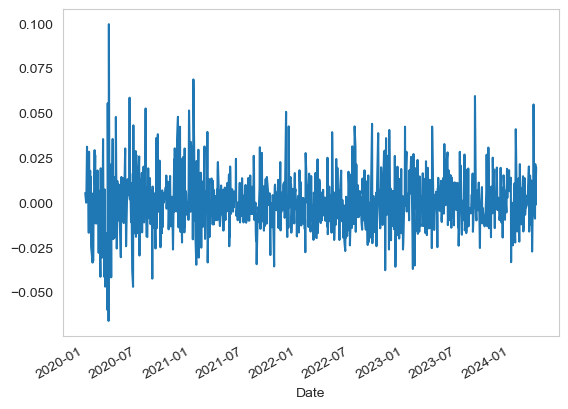

In [4]:
ret.plot(grid = False)

#### Exercise 1
pandas datareader 혹은 Financial Datareader를 이용하여 Apple의 주가를 가져와 3년치 수익률을 직접 구해 보자

#### 2. Distributional Properties of Returns

수익률을 분석하기 위해서는 기본적인 통계적 특성들을 알아야 한다

**Review**

first moments (mean)
$$\hat{μ} = \frac{1}{T}\sum_{t=1}^T x_t$$

second moments (variance)
$$\hat{σ_x^2} = \frac{1}{T-1}\sum_{t=1}^T (x_t - \hat\mu_x)^2$$

third moments (skewness)
$$\hat{S}(x) = \frac{1}{(T-1)\hat\sigma_x^3}\sum_{t=1}^T(x_t-\hat\mu_x)^3$$
$$t = \frac{\hat S (r)}{\sqrt{6/T}}$$

skewness가 음인 경우 분포는 오른쪽으로 치우친 모양에 왼쪽으로 긴 꼬리를 가지고 있고, 양인 경우에는 왼쪽으로 치우친 모양에 오른쪽으로 긴 꼬리를 가지고 있다

forth moments (kurtosis)
$$\hat{K}(x) = \frac{1}{(T-1)\hat\sigma_x^4}\sum_{t=1}^T(x_t - \hat\mu_x)^4$$
$$t = \frac{\hat K (r) - 3}{\sqrt{24/T}}$$

첨도가 클수록 분포는 더욱 뾰족한 모양을 띈다

Jarque Bera Statistic
$$\mathbf{JB} = \frac{\hat S^2 (r)}{\sqrt{6/T}} + \frac{(\hat K (r) - 3)^2}{\sqrt{24/T}}$$

In [5]:
ret.mean() # mean

0.0003826384752935789

In [6]:
ret.var() # variance

0.00025129517270538717

In [7]:
ret.skew() # skewness

0.5469556177853543

In [8]:
ret.kurt() # kurtosis

2.8144626467808687

**example 2**

금융 데이터는 대부분 정규분포보다는 약간 치우쳐져 있고(skewness), 첨도가 더 높은(kurtosis) 경향이 있다

Text(0.5, 1.0, 'return distribution')

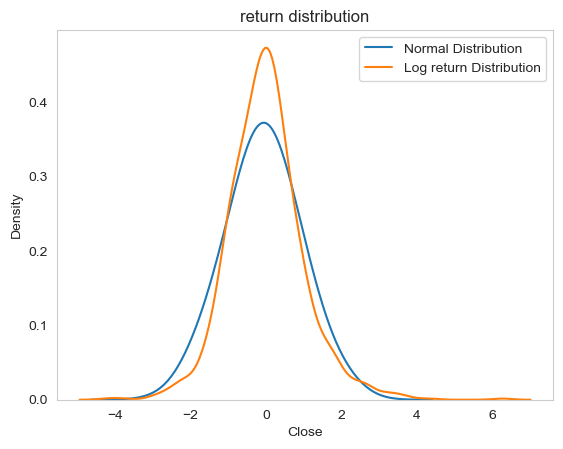

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(np.random.normal(size = 1000), label = 'Normal Distribution', bw_adjust = 2)
sns.kdeplot((ret - ret.mean())/ret.std(), label = 'Log return Distribution')
plt.legend()
plt.grid(False)
plt.title('return distribution')

#### Exercise 2
pandas datareader 혹은 Financial Datareader를 이용하여 Apple의 주가를 가져와 3년치 수익률의 평균, 분산, 왜도, 첨도를 모두 구해보고 정규분포와 비교해 보자

#### 3. Stationarity

- strict stationarity
    - 임의의 자연수 $t_1, t_2, \cdots, t_n$과 자연수 k에 대하여 n개의 확률변수에 대한 결합확률밀도함수와, 이 n개의 확률변수에서 k만큼의 시간 축을 이동하였을 때의 결합확률밀도함수가 동일하다면, 이 시계열은 강정상성(Strict Stationarity)를 갖는다고 한다.
    - 따라서 어떤 확률과정이 강정상성 조건을 만족한다면 모든 n에 대하여 결합확률밀도함수가 시간대를 바꾸어도 동일하다는 것을 보여야 하므로, 어떠한 시간대이든 분포가 항상 동일해야 한다.

- weak stationarity
    - 확률과정이 유한한 2차 적률(**Finite Second Moment**)을 갖고, 기댓값과 분산이 시점 t와 무관하게 항상 일정하며 자기공분산이 시점 t가 아닌 시차 k에 의존한다면 이를 약한 의미의 정상성을 갖는다고 한다.
    - $\mathrm{E}(Z_t) = \mu,~~ \mu \in \mathbf{R}$
    - $\mathrm{Var}(Z_t) = \sigma ^ 2, ~~ \sigma ^ 2 \in \mathbf{R}$
    - $\mathrm{Cov}(Z_t, Z_{t+k}) = \sigma_K, ~~\mathrm{for~any~t,h \geq 1}$
    - 대표적인 약정상성을 가진 확률과정을 **White Noise Process**라고 한다

**Correlation Function**
$$\rho_{x,y} = \frac{\mbox{Cov}(X,Y)}{\sqrt{\mbox{Var}(X)\mbox{Var}(Y)}}
= \frac{E[(X - μ_x)(Y - μ_y)]}{\sqrt{E(X-\mu_x)^2 E(Y-\mu_y)^2}}$$

sample Correlation function is

$$\hat\rho_{x,y} = \frac{\sum_{t=1}^T(x_t -\bar x)(y_t - \bar y)}{\sqrt{\sum_{t=1}^T(x_t -\bar x)^2 \sum_{t=1}^T(y_t - \bar y)^2}}$$

**Autocorrelation Function (ACF)**

$$\rho_{l} = \frac{\mathrm{Cov}(r_t,r_{t-l})}{\sqrt{\mathrm{Var}(r_t)\mathrm{Var}(r_{t-l})}} = \frac{\mathrm{Cov}(r_t,r_{t-l})}{\mathrm{Var}(r_t)} = \frac{\gamma_l}{\gamma_0}$$

sample autocorrelation function is

$$\hat\rho_{l} = \frac{\sum_{t=l+1}^T(r_t - \bar r)(r_{t-l} - \bar r)}{\sum_{t=1}^T(r_t - \bar r)^2}, ~~~~~~ 0 \leq l < T-1 $$

**Autocorrelation의 의미**

자기상관계수는 1기전 가격과 현재시점 가격간의 상관관계를 보는 것이다. 자기상관 계수를 봄으로써 현재가격이 과거와 얼마나 비슷하게 움직이는지 볼 수 있다. 이를 응용해서 자산가격의 Momentum효과를 볼 수도 있다

**example 3**

statsmodels를 이용해 ACF 값을 구하고 직접 plotting해 보자.

In [21]:
from statsmodels.tsa import stattools

acf값만을 구하려면 statsmodels.tsa에서 stattools 함수만을 사용하면 된다

In [22]:
n_lags = 10
atcf_qs = stattools.acf(np.log(samsung.Close), nlags = n_lags, qstat = True)
  # atcf_qs[0]: values of ACF
  # atcf_qs[1]: values of q-stat
  # atcf_qs[2]: p-values of the q-stat

In [23]:
atcf_qs[0] # Autocorrelation Functions

array([1.        , 0.992576  , 0.98539321, 0.97852288, 0.97188391,
       0.96564931, 0.95990105, 0.95393383, 0.94820658, 0.94283254,
       0.93648948])

확인한 결과, 삼성전자 주가의 로그화된 원 시계열에 대해서는 강한 memory가 있는 것으로 관측된다

In [24]:
atcf_qs = stattools.acf(ret.dropna(), nlags = n_lags, qstat = True)
atcf_qs[0]

array([ 1.        , -0.00206819, -0.01798345, -0.01803348, -0.00596702,
       -0.02806266,  0.0257012 ,  0.00931407,  0.01283891,  0.07292988,
       -0.04219548])

차분 시계열에 대해서는 memory가 관측되지 않는다. 즉, weak stationary를 보이고 있다

**Autocorrelation Function Plotting**

plotting을 위해서는 아래와 같은 라이브러리의 import가 필요하다

In [25]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf

원 시계열의 ACF를 그려본 결과 다음과 같이 관측된다

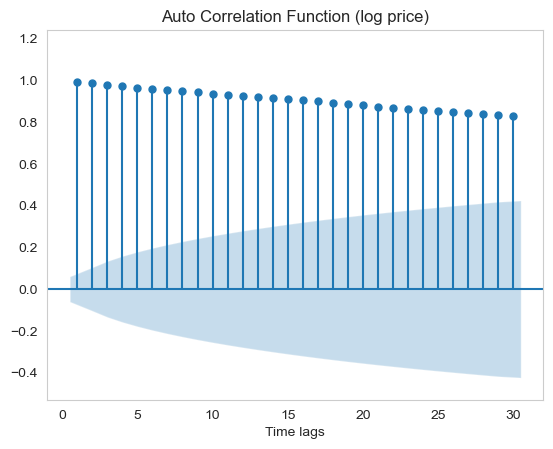

In [28]:
plot_acf(np.log(samsung.Close), auto_ylims = True, lags = range(1, 31))
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function (log price)')
plt.grid(False)
plt.show()

차분된 시계열에 대해서는 다음과 같이 관측된다. weak stationary한 계열로 변환된 것을 확인할 수 있다

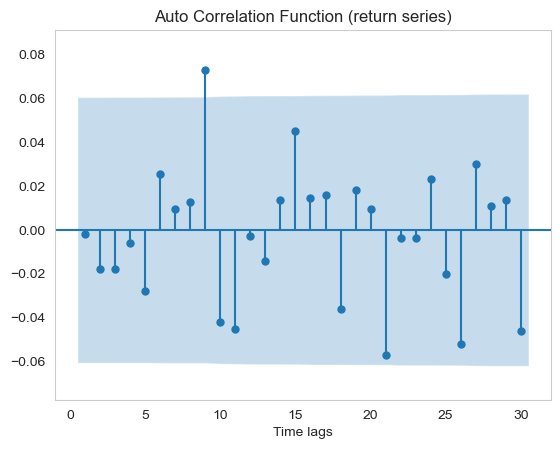

In [30]:
plot_acf(ret.dropna(), auto_ylims = True, lags = range(1, 31))
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function (return series)')
plt.grid(False)
plt.show()

#### Exercise 3

Exercise 1에서 구한 Apple 주가 계열과 차분된 시계열에 대해서 각각 ACF를 구하고 statsmodels를 이용해 Plotting해 보자